# High Pass Filter Calculations
### Calculating the required components to build a high pass filter with a given cutoff frequency

### 1. Using Scipy

In [6]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
cutoff = 1.5

In [11]:
order=1
b, a = signal.butter(order, cutoff, btype='low', analog=True)

In [12]:
w, h = signal.freqs(b, a)

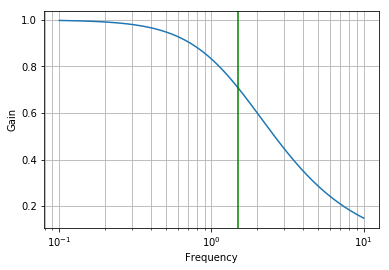

In [36]:
plt.plot(w,h)
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # Vertical line at cutoff frequency
plt.show()

In [39]:
print(gain[:10])
print(abs(gain[:10]))

[-0.01925921-0.57820372j -0.02016942-0.59169892j -0.02112254-0.6055071j
 -0.02212059-0.61963537j -0.02316568-0.634091j   -0.02426   -0.64888142j
 -0.02540586-0.66401419j -0.02660568-0.67949707j -0.02786198-0.69533794j
 -0.0291774 -0.71154487j]
[0.57852438 0.59204258 0.6058754  0.62003009 0.63451402 0.64933477
 0.66450004 0.68001774 0.69589593 0.71214284]


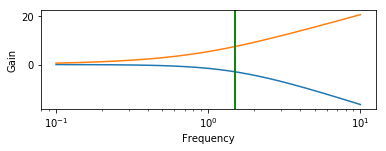

In [45]:
gain = 20*np.log10(h)
plt.subplot(2,1,2)
plt.plot(w, gain)
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # Vertical line at cutoff frequency

plt.plot(w, abs(gain))
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # Vertical line at cutoff frequency
plt.show()

### 2. Using Circuits Theory